In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Image, display

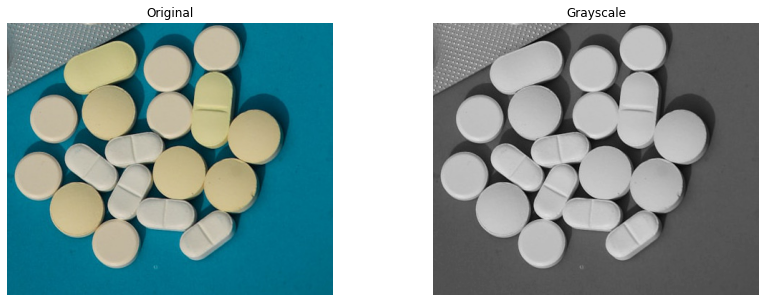

In [3]:
# Cargar imagen
img = cv.imread('../data/pills.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

fig = plt.figure(figsize=(14, 5))

plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale')
plt.axis('off')

plt.show()  

(-0.5, 454.5, 379.5, -0.5)

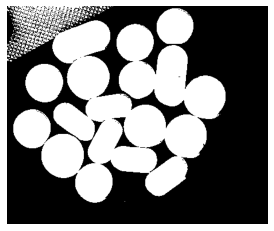

In [4]:
# Thresholding
ret, bin_img = cv.threshold(gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

plt.imshow(bin_img, cmap='gray')
plt.axis('off')

(-0.5, 454.5, 379.5, -0.5)

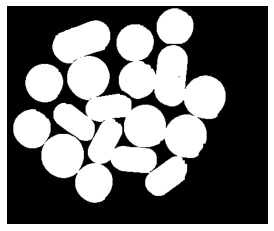

In [5]:
# noise removal
kernel = cv.getStructuringElement(cv.MORPH_RECT, (3, 3))
bin_img = cv.morphologyEx(bin_img, 
                           cv.MORPH_OPEN,
                           kernel,
                           iterations=3)

plt.imshow(bin_img, cmap='gray')
plt.axis('off')

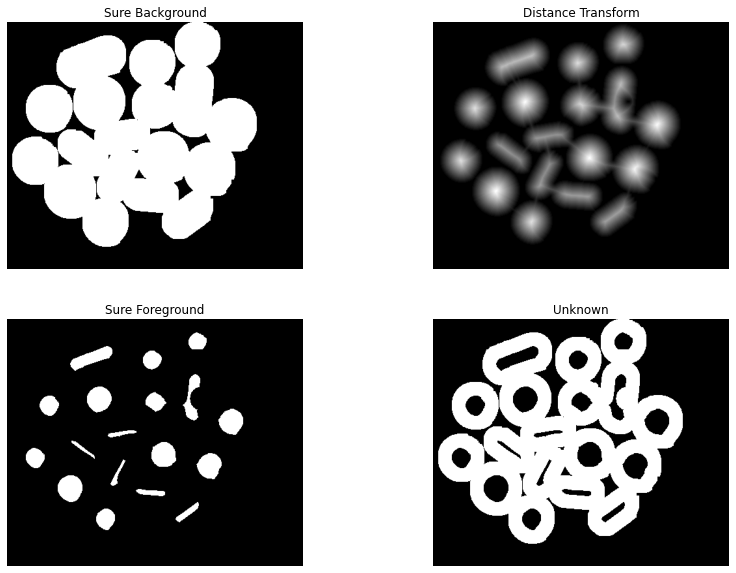

In [6]:
# Create subplots with 1 row and 2 columns
#fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
fig = plt.figure(figsize=(14, 10))
# sure background area
sure_bg = cv.dilate(bin_img, kernel, iterations=3)
plt.subplot(2, 2, 1)
plt.imshow(sure_bg, cmap='gray')
plt.title('Sure Background')
plt.axis('off')

# Distance transform
dist = cv.distanceTransform(bin_img, cv.DIST_L2, 5)
plt.subplot(2, 2, 2)
plt.imshow(dist, cmap='gray')
plt.title('Distance Transform')
plt.axis('off')

#foreground area
ret, sure_fg = cv.threshold(dist, 0.5 * dist.max(), 255, cv.THRESH_BINARY)
sure_fg = sure_fg.astype(np.uint8) 
plt.subplot(2, 2, 3) 
plt.imshow(sure_fg, cmap='gray')
plt.title('Sure Foreground')
plt.axis('off')

# unknown area
unknown = cv.subtract(sure_bg, sure_fg)
plt.subplot(2, 2, 4)
plt.imshow(unknown, cmap='gray')
plt.title('Unknown')
plt.axis('off')

plt.show()

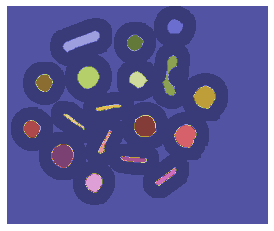

In [7]:
 # Marker labelling
# sure foreground 
ret, markers = cv.connectedComponents(sure_fg)
 
# Add one to all labels so that background is not 0, but 1
markers += 1
# mark the region of unknown with zero
markers[unknown == 255] = 0
 
plt.imshow(markers, cmap="tab20b")
plt.axis('off')
plt.show()

(-0.5, 454.5, 379.5, -0.5)

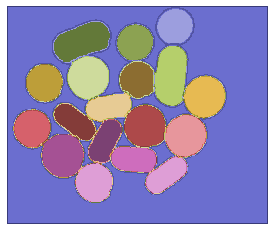

In [17]:
# watershed Algorithm
markers = cv.watershed(img, markers)
 
 
labels = np.unique(markers)
 
pills = []
for label in labels[2:]:  
 
# Create a binary image in which only the area of the label is in the foreground 
#and the rest of the image is in the background   
    target = np.where(markers == label, 255, 0).astype(np.uint8)
   
  # Perform contour extraction on the created binary image
    contours, hierarchy = cv.findContours(
        target, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE
    )
    pills.append(contours[0])


img = cv.drawContours(img, pills, -1, color=(0, 23, 223), thickness=2)

# Draw the outline   
plt.imshow(markers, cmap="tab20b")
plt.axis('off')

(-0.5, 454.5, 379.5, -0.5)

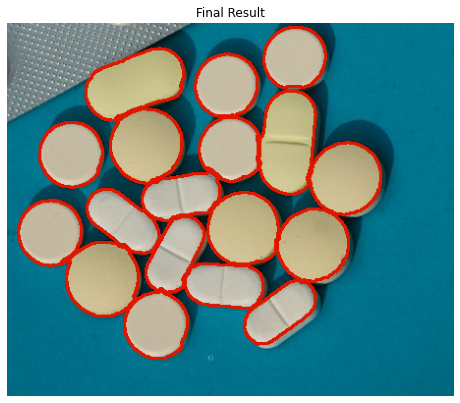

In [18]:
plt.figure(figsize=(8, 8))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Final Result')
plt.axis('off')

https://www.geeksforgeeks.org/image-segmentation-with-watershed-algorithm-opencv-python/ 